<a href="https://colab.research.google.com/github/sanchitmisra/Predicting-price-of-homes-Boston-Housing/blob/main/Predicting%20the%20price%20of%20homes%20using%20Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.



In [ ]:
desc_dict = {
    "CRIM" : "per capita crime rate by town",
    "ZN" : "proportion of residential land zoned for lots over 25,000 sq.ft.",
    "INDUS" : "proportion of non-retail business acres per town.",
    "CHAS" : "Charles River dummy variable (1 if tract bounds river; 0 otherwise)",
    "NOX" : "nitric oxides concentration (parts per 10 million)",
    "RM" : "average number of rooms per dwelling",
    "AGE" : "proportion of owner-occupied units built prior to 1940",
    "DIS" : "weighted distances to five Boston employment centres",
    "RAD" : "index of accessibility to radial highways",
    "TAX" : "full-value property:tax rate per $10,000",
    "PTRATIO" : "pupil-teacher ratio by town",
    "B" : "(Bk - 0.63)^2 where Bk is the proportion of blacks by town",
    "LSTAT" : "% lower status of the population",
    "MEDV" : "Median value of owner-occupied homes in $1000's",
}

In [ ]:
#Importing some of the useful liberaries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Importing dataset.
working_directory= "/content/housing.csv"
df= pd.read_csv(working_directory)
df

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
...,...
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...


In [ ]:
#Creating columns as per given in problem statement.
new_df = pd.read_csv(working_directory,names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'], sep="\s+", header=None)
new_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


#Analyzing dataset

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Great we have no null values in our datset.

In [ ]:
new_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


All of the characteristics are dispersed evenly and in a continuous pattern.




In [ ]:
new_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

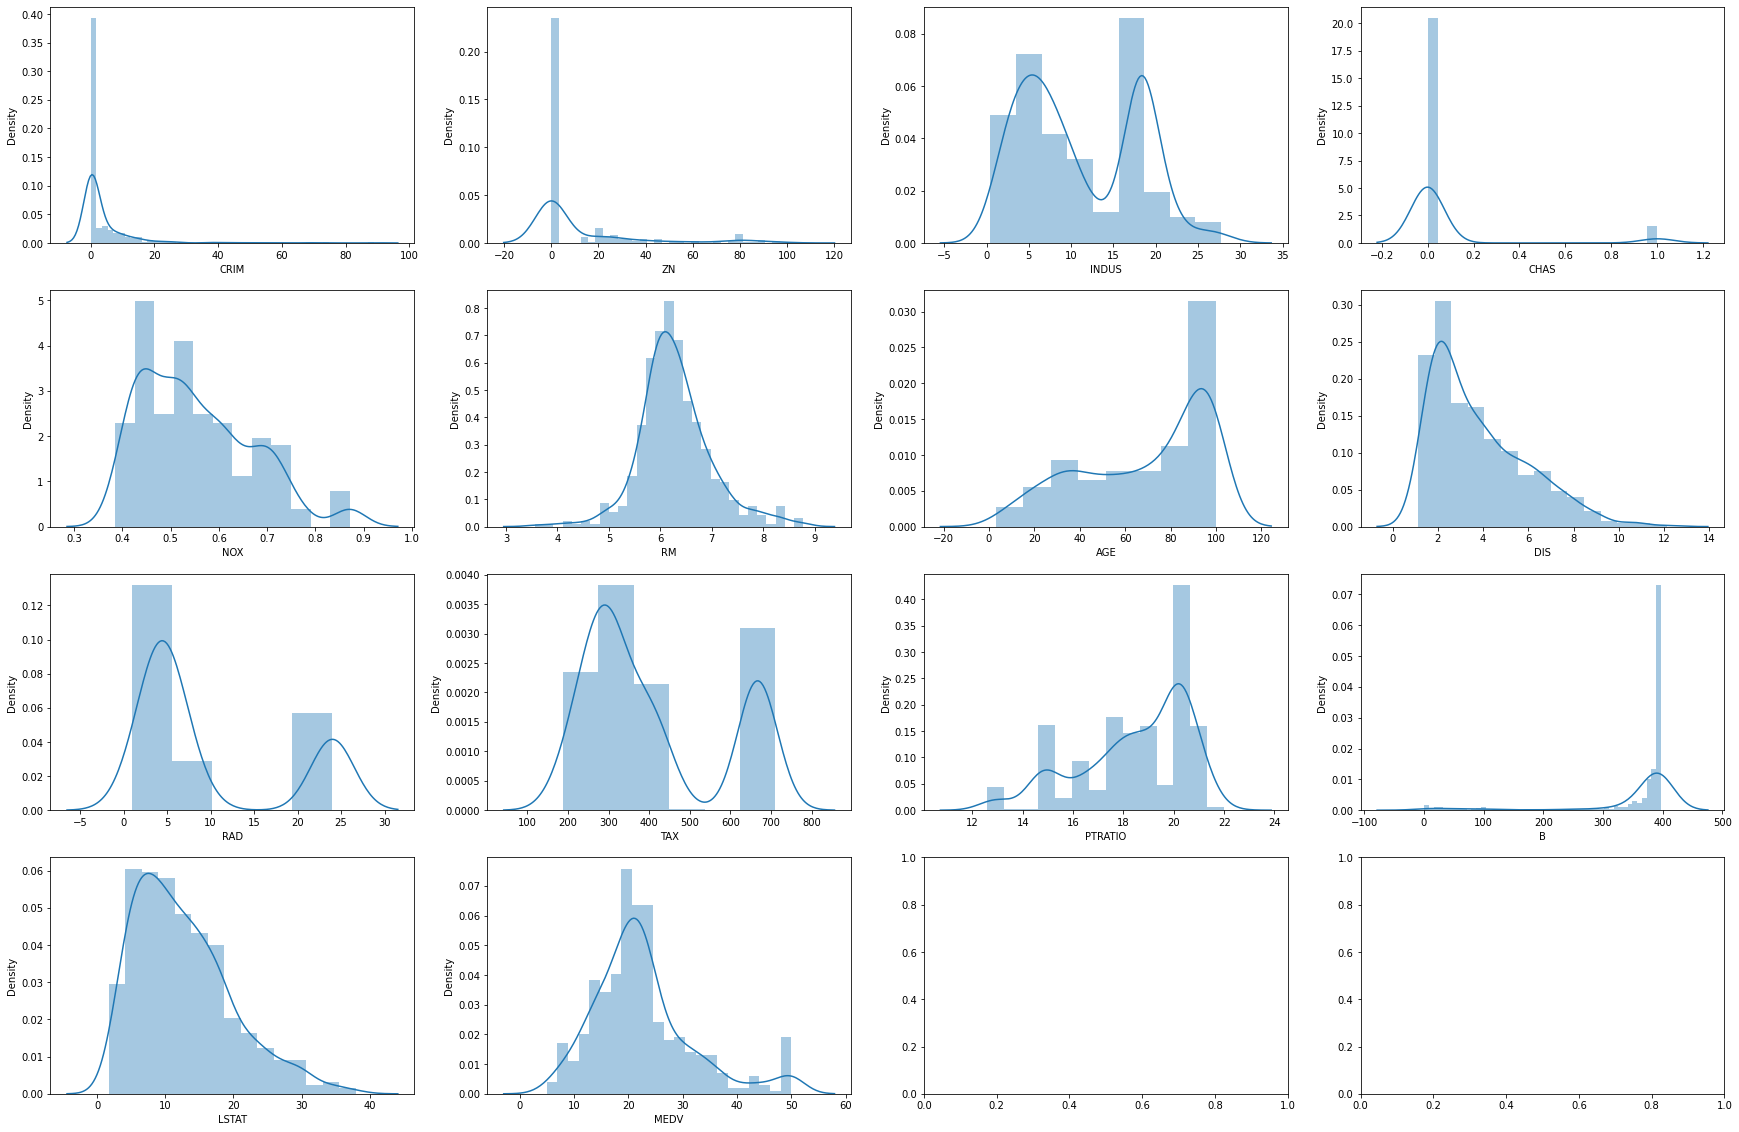

In [ ]:
#Analyzing all the features individually, if they follow any distribution.
fig, axes = plt.subplots(nrows = new_df.shape[1]//4 + (new_df.shape[1]%4 != 0)*1, ncols=4, figsize= (30,20))
for i, col in enumerate(new_df.columns):
  sns.distplot(new_df[col], ax=axes[i//4, i%4])

The displot of our dependent variable 'MEDV' shows its normally distributed with some outliers at the right end of graph.

#Bivariate Analysis

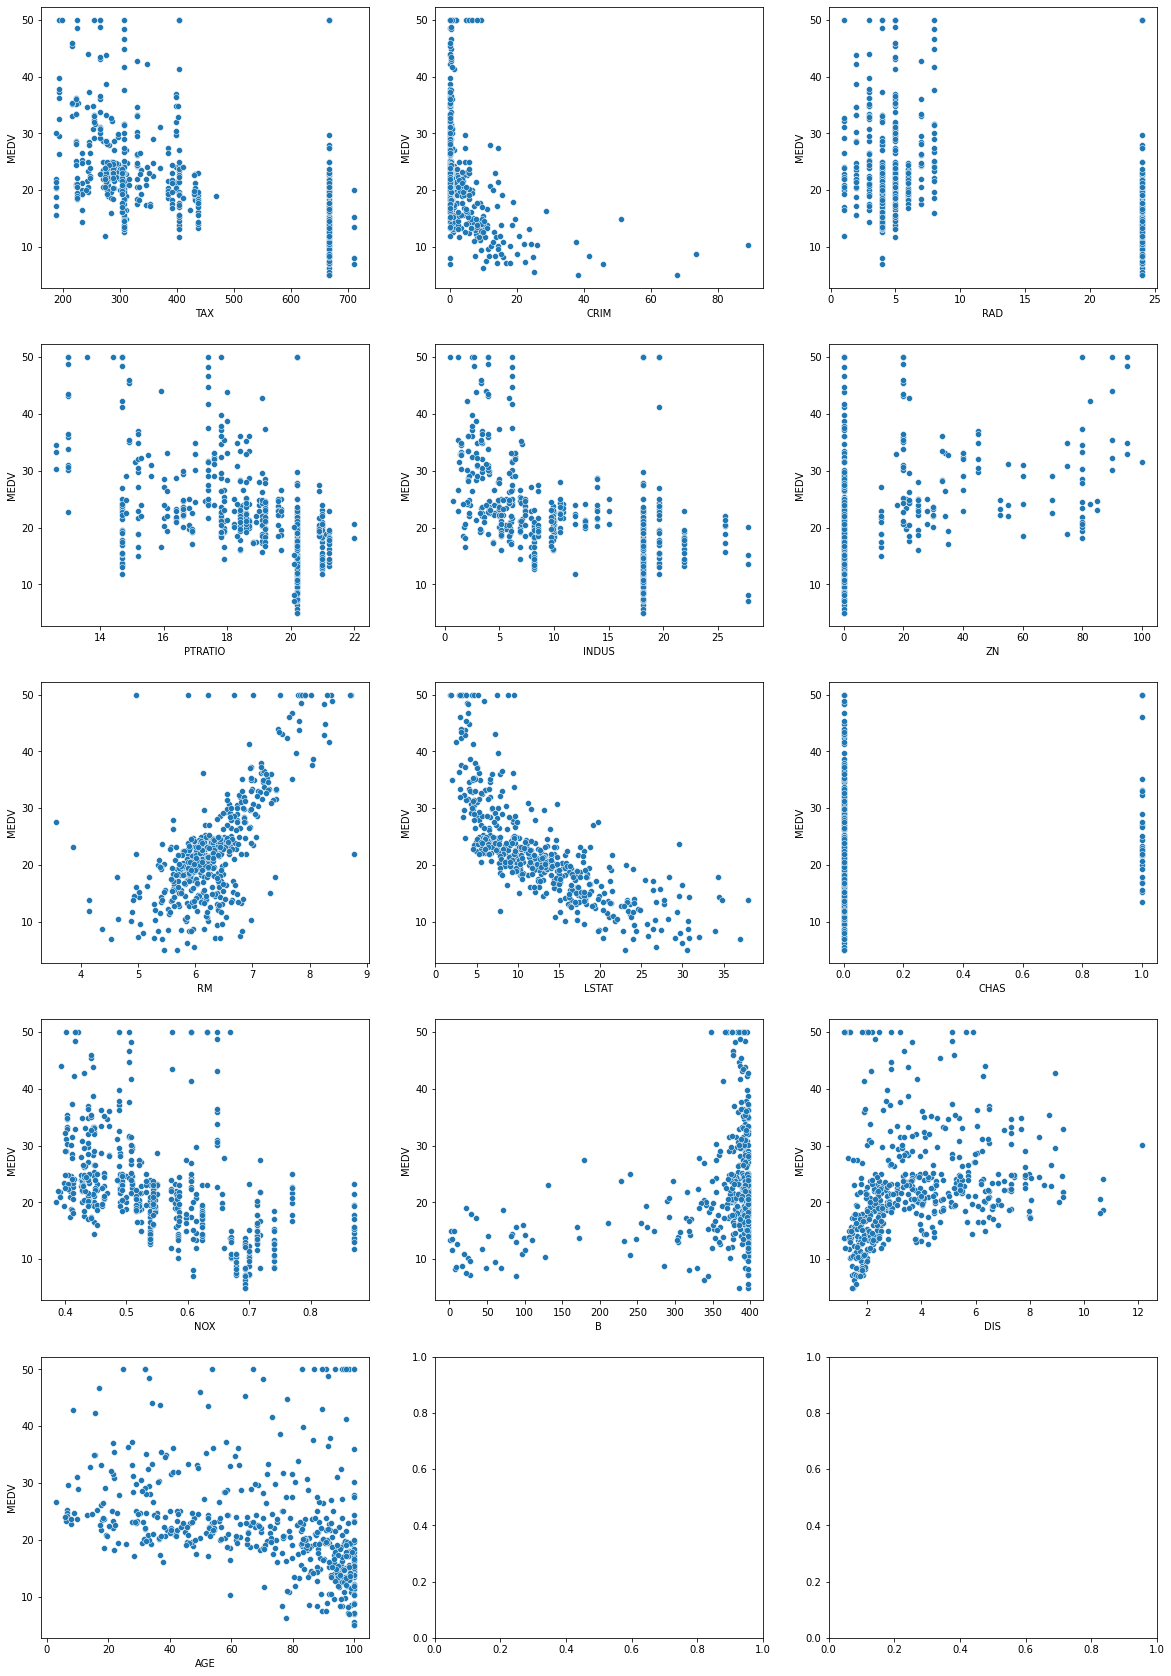

In [ ]:
#Visualizing all the independent variables with respect to our Target variable.
variable_df = new_df[list(set(new_df.columns) - {'MEDV'})]
fig, axes = plt.subplots(nrows = (variable_df.shape[1])//3 + (variable_df.shape[1]%4 != 0)*1, ncols=3, figsize= (20,30))
for i, col in enumerate(variable_df.columns):
  sns.scatterplot(data=new_df, x=col, y="MEDV", ax = axes[i//3, i%3])

#Lets find the correlation between features.

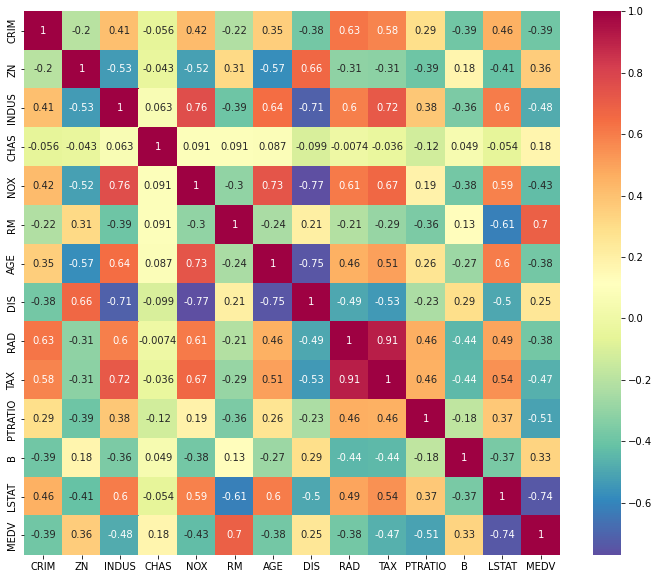

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(new_df.corr(),annot= True, cmap='Spectral_r')

From above heatmap we can interpret that:
##For MEDV:

*   MEDV is positively correlated to RM.
*   MEDV is negatively correlated to LSTAT.

##For the independent Variables:


*   TAX-RAD have highest positive correlation. 0.91
*   ZN-INDUS, AGE-DIS have highest negative correlation. -0.53, -0.75



##We know that to find linear regregression the dependent and independent variables must be linearly related.
##Therefor we can use RM and LSTAT for the same and it would be best to avoid TAX,RAD,ZN,INDUS,AGE,DIS. As these columns exhibit multi-co-linearity.





#Lets plot scatterplot between LSTAT and MEDV:

Text(0, 0.5, 'LSTAT')

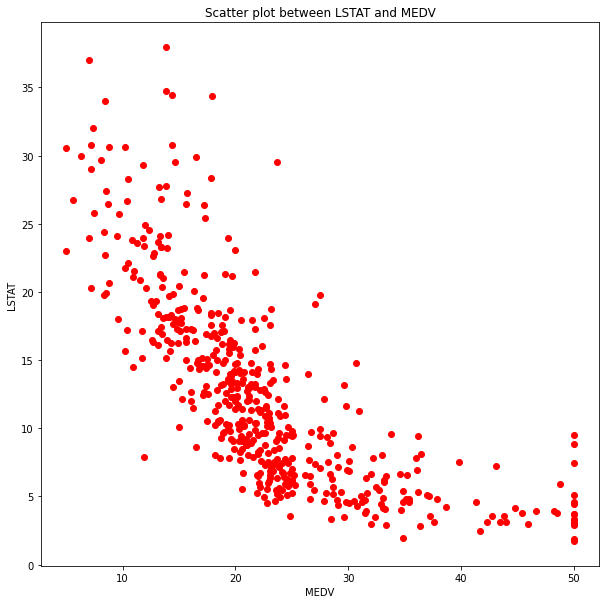

In [ ]:
plt.figure(figsize=(10,10))
x = new_df['MEDV']
y = new_df['LSTAT']
plt.scatter(x, y,color='red')
plt.title('Scatter plot between LSTAT and MEDV')
plt.xlabel('MEDV')
plt.ylabel('LSTAT')

##The above plot suggests negative linear regression, which seconds the heatmap and makes sense if we see the column we can tell as the % of lower status of the population increases, no. of owner-occupied homes in price range of $1000  would decrease.

#Lets plot scatterplot between RM and MEDV:

Text(0.5, 0, 'RM')

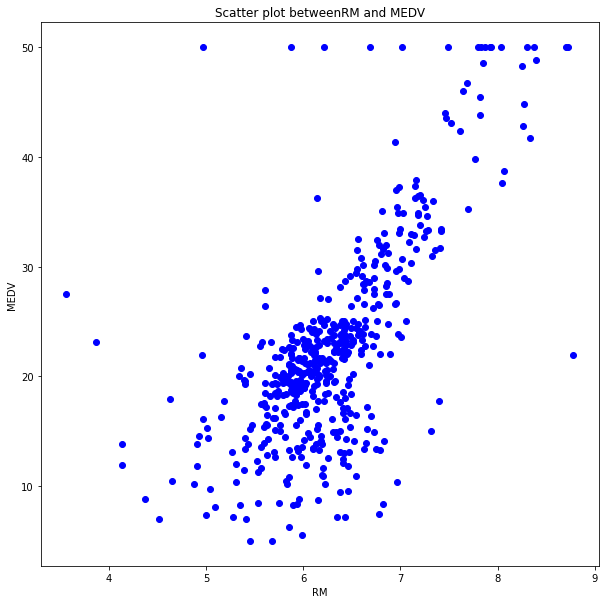

In [ ]:
plt.figure(figsize=(10,10))
x = new_df['RM']
y = new_df['MEDV']
plt.scatter(x, y,color='blue')
plt.title('Scatter plot betweenRM and MEDV')
plt.ylabel('MEDV')
plt.xlabel('RM')

##The above plot suggests positive linear regression, which again agrees with the heatmap and makes sense if we see the column we can tell as number of rooms per dwelling increase, no. of owner-occupied homes in price range of $1000 would decrease.


##Hence to conclude, LSTAT and RM are the best possible independent variables to make any future predictions about our dependent variable MEDV.

##Calculating the best fit line for RM and MEDV.

In [ ]:
rmdf={'y':new_df['MEDV'],'x':new_df['RM']}
rmdf=pd.DataFrame(rmdf)
rmdf['x2']= rmdf['x']**2
rmdf['xy']= rmdf['x']*rmdf['y']

n= len(rmdf['y'])
xys=rmdf['xy'].sum()
xs=rmdf['x'].sum()
ys=rmdf['y'].sum()
s=rmdf['x']**2
x2s=s.sum()
b1= ((n*xys)-(xs*ys))/((n*x2s)-(xs)**2)
print("b1 = ", b1)

ybar= ys/n
xbar= xs/n
b0=ybar-(b1*xbar)
print("b0 = ", b0)

b1 =  9.102108981180319
b0 =  -34.67062077643861


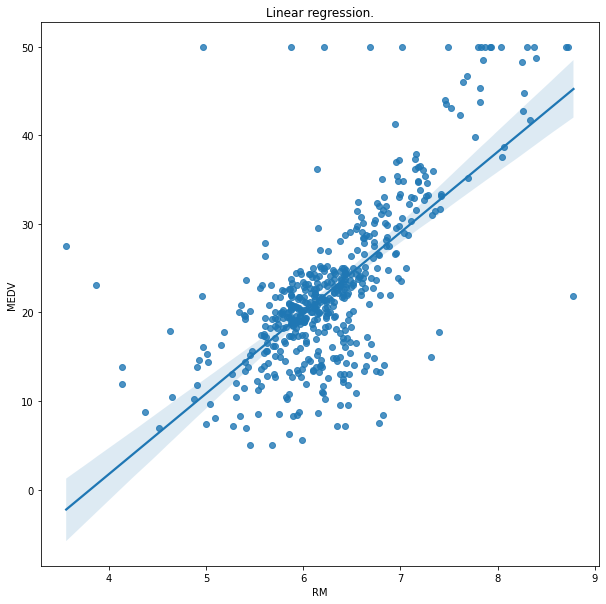

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Linear regression.')
plt.xlabel('RM')
plt.ylabel('MEDV')
sns.regplot(x=new_df['RM'].values,y=new_df['MEDV'].values)

In [ ]:
rmdf={'y':new_df['MEDV'],'x':new_df['LSTAT']}
rmdf=pd.DataFrame(rmdf)
rmdf['x2']= rmdf['x']**2
rmdf['xy']= rmdf['x']*rmdf['y']

n= len(rmdf['y'])
xys=rmdf['xy'].sum()
xs=rmdf['x'].sum()
ys=rmdf['y'].sum()
s=rmdf['x']**2
x2s=s.sum()
b1= ((n*xys)-(xs*ys))/((n*x2s)-(xs)**2)
print("b1 = ", b1)

ybar= ys/n
xbar= xs/n
b0=ybar-(b1*xbar)
print("b0 = ", b0)

b1 =  -0.9500493537579933
b0 =  34.55384087938314


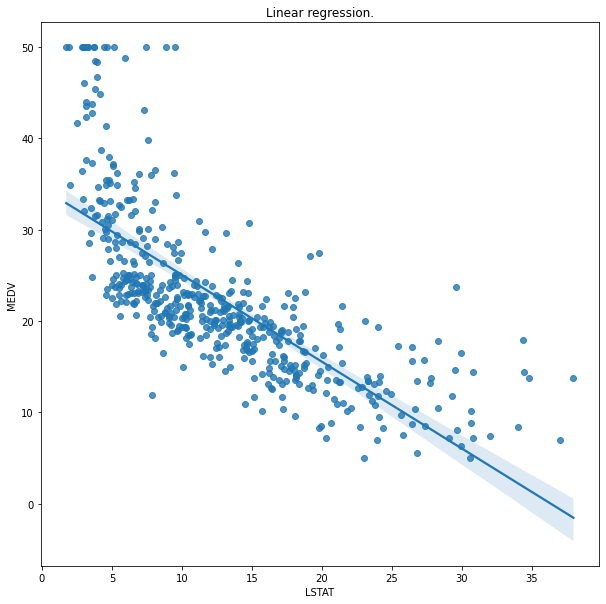

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Linear regression.')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
sns.regplot(x=new_df['LSTAT'].values,y=new_df['MEDV'].values)

#Extra multivariate regression:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X = variable_df[list(set(variable_df.columns) - {"PTRATIO", "NOX", "TAX", "RM", "AGE", "B"})]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
2,6.900077,INDUS
3,6.726973,LSTAT
1,4.678181,RAD
6,3.968908,DIS
4,2.299351,ZN
0,2.067135,CRIM
5,1.086574,CHAS


In [ ]:
new_X = X.values
new_y = new_df["MEDV"].values  

#Creating model for predicting the median value of homes:

##Let's begin with splitting data:

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
regressor= LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predicting the Test set result.
y_pred= regressor.predict(X_test)
y_pred

array([29.20322675, 38.07458612, 15.80565577, 25.66211959, 17.58786659,
       21.56377508, 16.83418611, 12.51085126, 20.31311942, 23.13235459,
       22.26106263, 14.80520795, -3.69238886, 19.51488174, 22.10570622,
       22.32802974, 16.60923268,  5.98352308, 36.27758172, 16.48851616,
       28.86108109, 30.51210064, 13.02562266, 26.72619058, 19.62711999,
       16.33616209, 23.3057781 , 15.52986117, 22.01128416, 22.62319616,
       24.27132902, 26.47503969, 21.07019023, 24.52388239, 13.76650667,
       20.34333158, 28.65564025, 23.57109017, 23.68350458, 23.85585626,
       16.53927619, 32.59066455, 37.80258763, 19.06245946, 28.82169559,
       18.2897057 , 17.59611765, 24.59717648, 17.35648655, 32.11618345,
       18.86769528, 30.21092404, 16.91719588, 28.74875863, 35.4921222 ,
       20.7902426 , 18.77199705, 35.62363757, 24.75697609, 12.42380923,
       20.76638117, 29.70153664, 31.89817557, 23.53559719, 23.09047297,
       16.81555267, 18.42294951, 27.98709637, 34.43998061, 15.71

In [ ]:
y_test.sort_index()

0      24.0
2      34.7
9      18.9
11     18.9
18     20.2
       ... 
491    13.6
496    19.7
497    18.3
500    16.8
501    22.4
Name: MEDV, Length: 102, dtype: float64

In [42]:
print ('Residual sum of squares Train: %.2f' % np.mean((regressor.predict(X_train)- y_train) ** 2))
print ('Residual sum of squares Test: %.2f' % np.mean((regressor.predict(X_test)- y_test) ** 2))

Residual sum of squares Train: 32.20
Residual sum of squares Test: 26.13


Hence, above we predicted the median values of homes with help of Linear Regression model.